Notebook to investigate raw FinBERT predictions (excluding results of Granger Causality & OLS, see \notebooks\exploratory_analysis_regression_results.ipnyb)

In [2]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import re
import itertools
import datetime as dt
import sqlite3
from collections import defaultdict

# connect to folder for custom functions
root = Path.cwd().parent
vis_path = root / "src" / "visualizations" 
mod_path = root / "src" / "modelling" 
sys.path.append(str(vis_path))
sys.path.append(str(mod_path))

from read_articles import read, investigate_hype_articles
from plot_functions import plot_aini_series_subplots, plot_aini_hist_grid_by_years
from compute_extrema import compute_aini_extrema
from calculate_summary_statistics import calculate_aini_statistics

In [3]:
# prepare paths
var_path = root / "data" / "processed" / "variables"
art_path = root / "data" / "processed" / "articles"
table_path = root / "reports" / "tables"
fig_path = root / "reports" / "figures"

# load aini data
aini_custom = pd.read_csv(var_path / "binary_AINI_variables.csv")
aini_w0 = pd.read_csv(var_path / "w0_AINI_variables.csv")
aini_w1 = pd.read_csv(var_path / "w1_AINI_variables.csv")
aini_w2 =  pd.read_csv(var_path / "w2_AINI_variables.csv")


In [4]:
# create dataframes for visualizaions
normalized_AINI = pd.DataFrame()

# ensure sorting
aini_w0 = aini_w0.sort_values("date")
aini_w1 = aini_w1.sort_values("date")
aini_w2 = aini_w2.sort_values("date")
aini_custom = aini_custom.sort_values("date")

# compute extrema
merged, tidy, pivot, extrema = compute_aini_extrema(aini_w0,aini_w1,aini_w2,aini_custom,exclude_dates=["2023-07-15","2023-06-30"])
aini_w2

c:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\src\modelling\compute_extrema.py:104: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tidy.pivot_table(
c:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\src\modelling\compute_extrema.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tidy.groupby(["type", "date"])
c:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\src\modelling\compute_extrema.py:123: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warnin

,date,normalized_AINI,simple_AINI,EMA_02,EMA_08
0,2023-04-01,0.0,0,0.000000,0.000000
1,2023-04-02,0.0,0,0.000000,0.000000
2,2023-04-03,0.0,0,0.000000,0.000000
3,2023-04-04,0.0,0,0.000000,0.000000
4,2023-04-05,0.0,0,0.000000,0.000000
...,...,...,...,...,...
776,2025-06-12,0.0,0,0.047604,0.013605
777,2025-06-13,0.1,3,0.058083,0.082721
778,2025-06-14,0.0,0,0.046467,0.016544
779,2025-06-15,0.0,0,0.037173,0.003309


In [5]:
# show extrema
extrema.sort_values("n measures",ascending=False)

,type,date,n measures,measure
0,minimum,2025-02-06,3,"normalized_AINI_custom, EMA_02_custom, EMA_08_..."
12,maximum,2025-06-07,3,"normalized_AINI_w0, EMA_02_w0, EMA_08_w0"
13,maximum,2025-06-16,3,"normalized_AINI_w2, EMA_02_w2, EMA_08_w2"
11,maximum,2023-04-01,3,"normalized_AINI_custom, EMA_02_custom, EMA_08_..."
4,minimum,2025-01-31,2,"EMA_02_w1, EMA_02_w2"
1,minimum,2023-08-13,2,"normalized_AINI_w0, EMA_08_w0"
14,maximum,2025-06-10,2,"normalized_AINI_w1, EMA_08_w1"
3,minimum,2025-01-28,2,"normalized_AINI_w1, EMA_08_w1"
2,minimum,2024-08-02,2,"normalized_AINI_w2, EMA_08_w2"
5,minimum,2025-01-20,1,EMA_02_w0


Explore differences in min, max, mean and std. of AINI variables

In [6]:
stats = calculate_aini_statistics(merged)
stats.to_html(table_path / "AINI_summary_statistics.html")
stats

,scope,variable,count,mean,std,min,median,max
0,Total,EMA_02_custom,779,-0.087649,0.031978,-0.284651,-0.086231,0.000000
1,Total,EMA_02_w0,779,-0.000683,0.019049,-0.068745,0.000057,0.058285
2,Total,EMA_02_w1,779,-0.004571,0.023188,-0.109569,-0.002387,0.057163
3,Total,EMA_02_w2,779,-0.005765,0.022203,-0.097269,-0.003178,0.069739
4,Total,EMA_08_custom,779,-0.087504,0.063683,-0.456777,-0.081199,0.000000
...,...,...,...,...,...,...,...,...
59,2025,normalized_AINI_w2,141,0.000121,0.069441,-0.208333,0.000000,0.200000
60,2025,simple_AINI_custom,141,-3.106383,3.600996,-26.000000,-2.000000,0.000000
61,2025,simple_AINI_w0,141,0.141844,1.895791,-5.000000,0.000000,7.000000
62,2025,simple_AINI_w1,141,0.078014,2.324008,-8.000000,0.000000,8.000000


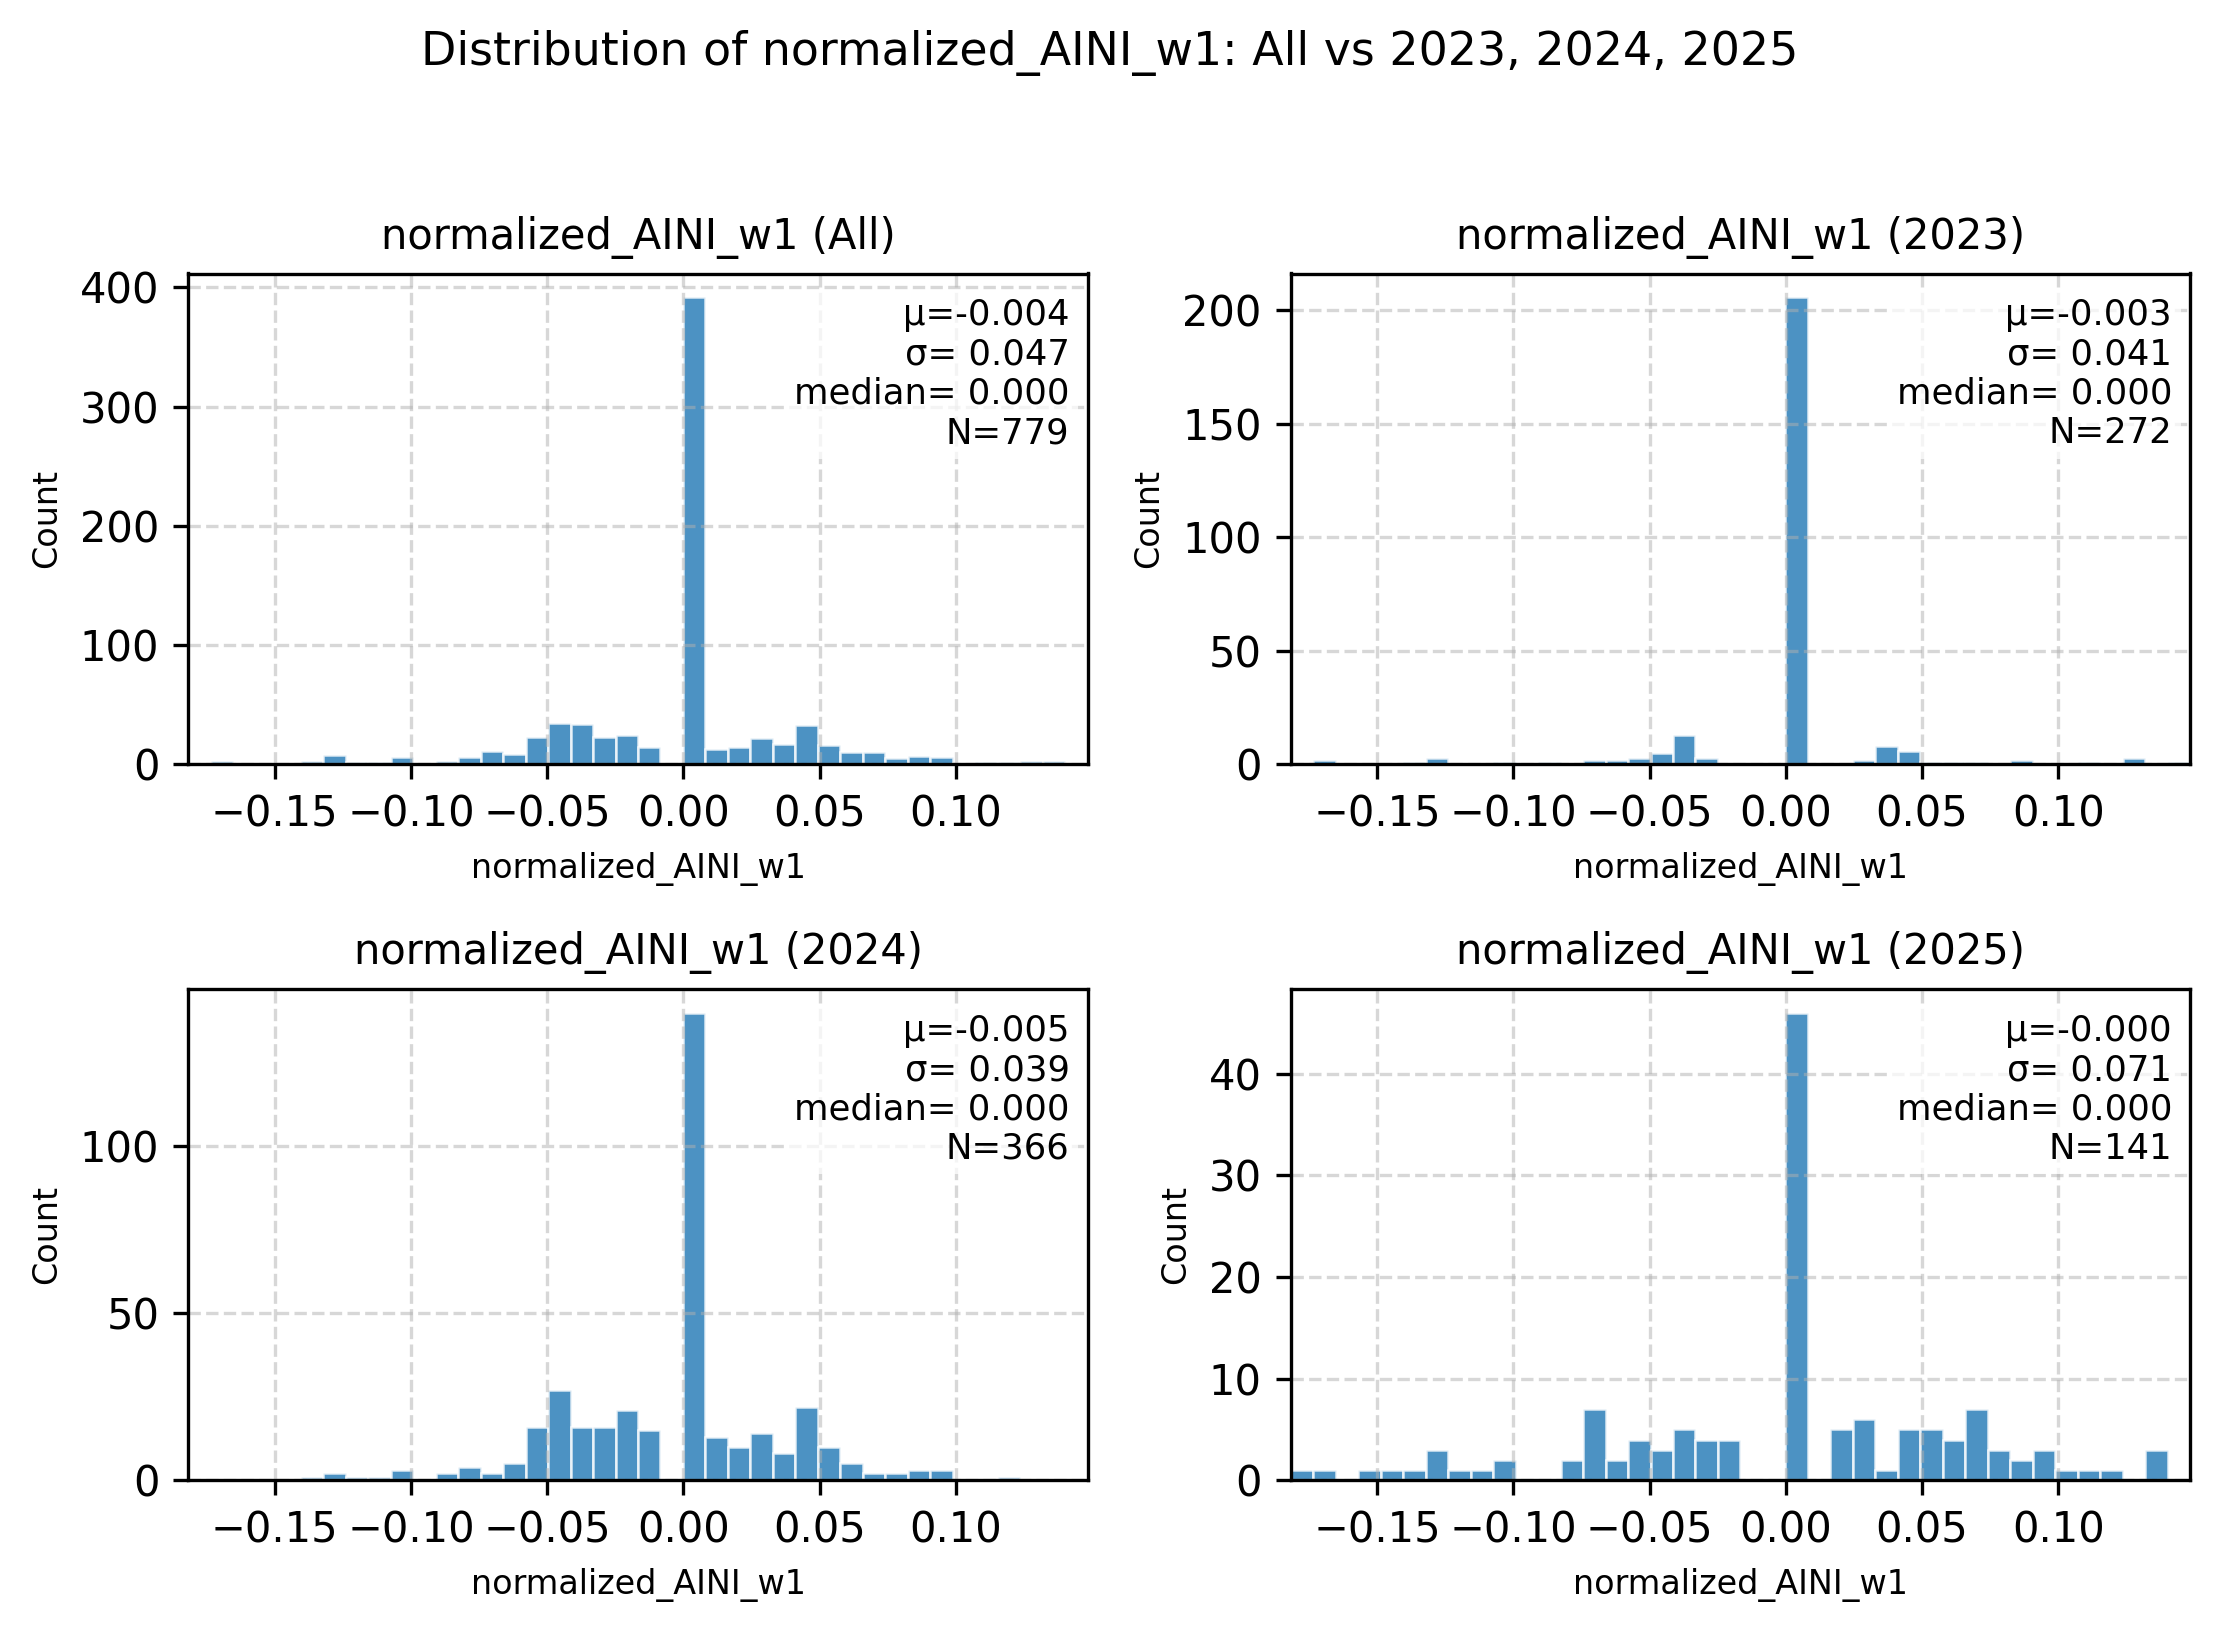

In [7]:
# plot distribution, ignoring raw counts due to unequal count of articles / day
vars = ["EMA_02_w0"] 
outpath_hist = fig_path / "aini_hist_w1_panels.png"

plot_aini_hist_grid_by_years(
            df = merged,
            outpath= outpath_hist
        )


In [8]:
# write to csv
extrema.to_csv(table_path / "aini_extrema.csv")

In [9]:
# Convert to LaTeX with booktabs, tabular (single-page), wrapped in adjustbox
latex_table = extrema.to_latex(
    index=False,
    escape=True,
    column_format="l" + "c" * (len(extrema.columns) - 1),
    bold_rows=False
)

# Add booktabs spacing
latex_table = latex_table.replace("\\toprule", "\\toprule\n\\addlinespace")
latex_table = latex_table.replace("\\midrule", "\\midrule\n\\addlinespace")
latex_table = latex_table.replace("\\bottomrule", "\\addlinespace\n\\bottomrule")

# Wrap in table + adjustbox
latex_wrapped = (
    "\\begin{table}[!htbp]\n"
    "\\centering\n"
    "\\begin{adjustbox}{width=\\textwidth}\n"
    + latex_table +
    "\\end{adjustbox}\n"
    "\\caption{AINI extrema}\n"
    "\\label{tab:aini_extrema}\n"
    "\\end{table}\n"
)

# Save to file
output_path = table_path / "aini_extrema.tex"
with open(output_path, "w") as f:
    f.write(latex_wrapped)

Calculate weekly extrema (by calendar week)

In [10]:
# derive calendar week (ISO year + week number)
tidy["week"] = tidy["date"].dt.to_period("W").apply(lambda r: r.start_time)

# Count how often each min/max week occurs
counts_by_week = (
    tidy.groupby(["type", "week"])
        .size()
        .reset_index(name="count")
        .sort_values(["type", "count"], ascending=[True, False])
)

# subset n > 0
extrema_weekly = counts_by_week[counts_by_week["count"] > 0]

# collect variables for each week
week_dict = (
    tidy.groupby(["week"])["variable"]
    .apply(list)
    .to_dict()
)

# attach variables to each week
extrema_weekly["measure"] = extrema_weekly["week"].map(week_dict)

# bring into convenient format
extrema_weekly_clean = extrema_weekly.copy()

# week start (Monday)
week_start = extrema_weekly_clean["week"]
# week end (Sunday) = start + 6 days
week_end = week_start + pd.Timedelta(days=6)

# format as "dd.mm.yyyy - dd.mm.yyyy"
extrema_weekly_clean["week"] = (
    week_start.dt.strftime("%d.%m.%Y") + " - " + week_end.dt.strftime("%d.%m.%Y")
)

extrema_weekly_clean["type"] = extrema_weekly_clean["type"].replace({"min": "minimum", "max": "maximum"})
extrema_weekly_clean.rename(columns={"count": "n measures"}, inplace=True)

# save
extrema_weekly_clean.to_csv(table_path / "aini_weekly_extrema.csv", index=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_26092\2630997574.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tidy.groupby(["type", "week"])
C:\Users\PC\AppData\Local\Temp\ipykernel_26092\2630997574.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extrema_weekly["measure"] = extrema_weekly["week"].map(week_dict)
C:\Users\PC\AppData\Local\Temp\ipykernel_26092\2630997574.py:38: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the

In [11]:
# Convert to LaTeX with booktabs, tabular (single-page), wrapped in adjustbox
latex_table = extrema_weekly_clean.to_latex(
    index=False,
    escape=True,
    column_format="l" + "c" * (len(extrema_weekly_clean.columns) - 1),
    bold_rows=False
)

# Add booktabs spacing
latex_table = latex_table.replace("\\toprule", "\\toprule\n\\addlinespace")
latex_table = latex_table.replace("\\midrule", "\\midrule\n\\addlinespace")
latex_table = latex_table.replace("\\bottomrule", "\\addlinespace\n\\bottomrule")

# Wrap in table + adjustbox
latex_wrapped = (
    "\\begin{table}[!htbp]\n"
    "\\centering\n"
    "\\begin{adjustbox}{width=\\textwidth}\n"
    + latex_table +
    "\\end{adjustbox}\n"
    "\\caption{AINI extrema}\n"
    "\\label{tab:aini_extrema}\n"
    "\\end{table}\n"
)

# Save to file
output_path = table_path / "aini_extrema_weekly.tex"
with open(output_path, "w") as f:
    f.write(latex_wrapped)

In [12]:
extrema_weekly_clean.sort_values("n measures",ascending=False)

,type,week,n measures,measure
4,minimum,27.01.2025 - 02.02.2025,4,"[normalized_AINI_w1, EMA_02_w1, EMA_08_w1, EMA..."
5,minimum,03.02.2025 - 09.02.2025,3,"[normalized_AINI_custom, EMA_02_custom, EMA_08..."
10,maximum,27.03.2023 - 02.04.2023,3,"[normalized_AINI_custom, EMA_02_custom, EMA_08..."
17,maximum,02.06.2025 - 08.06.2025,3,"[normalized_AINI_w0, EMA_02_w0, EMA_08_w0]"
19,maximum,16.06.2025 - 22.06.2025,3,"[normalized_AINI_w2, EMA_02_w2, EMA_08_w2]"
1,minimum,07.08.2023 - 13.08.2023,2,"[normalized_AINI_w0, EMA_08_w0]"
2,minimum,29.07.2024 - 04.08.2024,2,"[normalized_AINI_w2, EMA_08_w2]"
18,maximum,09.06.2025 - 15.06.2025,2,"[normalized_AINI_w1, EMA_08_w1]"
3,minimum,20.01.2025 - 26.01.2025,1,[EMA_02_w0]
16,maximum,17.03.2025 - 23.03.2025,1,[EMA_02_w1]


load data with AINI predictions & compare corpora with maxima and minima

In [13]:
# load & merge w1 data custom finbert data
c_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_on_binary.csv")
c_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_on_binary.csv")
c_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_on_binary.csv")
c_df = pd.concat([c_df23,c_df24,c_df25]) 

# load & merge w0 data
w0_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_windsize_0.csv")
w0_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_windsize_0.csv")
w0_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_windsize_0.csv")
w0_df = pd.concat([w0_df23,w0_df24,w0_df25]) 

# load & merge w1 data
w1_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_windsize_1.csv")
w1_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_windsize_1.csv")
w1_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_windsize_1.csv")
w1_df = pd.concat([w1_df23,w1_df24,w1_df25]) 

# merge on normalized_aini_wo to identify relevant articles
w2_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_windsize_2.csv")
w2_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_windsize_2.csv")
w2_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_windsize_2.csv")
w2_df = pd.concat([w2_df23,w2_df24,w2_df25]) 

# create df list 
aini_dfs = [c_df,w0_df,w1_df,w2_df]


In [14]:
# verify integrity 
for df in aini_dfs:
    print(
        f"\nFirst entry (date): {df['date'].min()} "
        f"\nLast entry (date): {df['date'].max()} "
        f"\n# entries: {len(df)} "
        f"\n# non-unique article_id: {df['article_id'].duplicated().sum()} "
        f"\n# unique article_id: {df['article_id'].nunique()} " 
        f"\nMin article_id: {df['article_id'].min()} "
        f"\nMax article_id: {df['article_id'].max()} "
        f"\nColumns: {list(df.columns)}\n"
    )



First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 21886 
# non-unique article_id: 1898 
# unique article_id: 19988 
Min article_id: 1 
Max article_id: 37460 
Columns: ['article_id', 'image_src', 'scanned_time', 'title', 'sub_title', 'corpus', 'index_id', 'id', 'date', 'link', 'section', 'cleaned_corpus', 'ai_window', 'predicted_label', 'predicted_class', 'ai_relevant', 'sentiment_label', 'sentiment_score', 'hype_score']


First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 22904 
# non-unique article_id: 1898 
# unique article_id: 21006 
Min article_id: 1 
Max article_id: 37460 
Columns: ['article_id', 'image_src', 'scanned_time', 'title', 'sub_title', 'corpus', 'index_id', 'id', 'date', 'link', 'section', 'cleaned_corpus', 'text', 'ai_window', 'ai_relevant', 'sentiment_label', 'sentiment_score', 'hype_score']


First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 2

In [15]:
# investigate duplicates in article ids
dups = w0_df[w0_df[["article_id", "title"]].duplicated(keep=False)].sort_values("article_id")
dups

,article_id,image_src,scanned_time,title,sub_title,corpus,index_id,id,date,link,section,cleaned_corpus,text,ai_window,ai_relevant,sentiment_label,sentiment_score,hype_score


In [16]:
# subset for relevant columns
rel_col = ["date","article_id","sentiment_label","hype_score"]
clean_df = []

for df in aini_dfs:
    df = df[rel_col].copy()
    clean_df.append(df)
    
# unpack supsetted dataframes containing Finbert AINI estimates    
c_df_sub,w0_df_sub,w1_df_sub,w2_df_sub = clean_df
w2_df_sub

,date,article_id,sentiment_label,hype_score
0,2023-01-10 00:00:00,36,neutral,0
1,2023-01-10 00:00:00,39,neutral,0
2,2023-01-12 00:00:00,87,neutral,0
3,2023-01-12 00:00:00,102,neutral,0
4,2023-01-13 00:00:00,111,neutral,0
...,...,...,...,...
4055,2025-06-16 00:00:00,4120,neutral,0
4056,2025-06-16 00:00:00,4121,neutral,0
4057,2025-06-16 00:00:00,4122,neutral,0
4058,2025-06-16 00:00:00,4123,neutral,0


In [17]:
# verify integrity 
for df in clean_df:
    print(
        f"First entry (date): {df['date'].min()} "
        f"\nLast entry (date): {df['date'].max()} "
        f"\n# entries: {len(df)} "
        f"\n# non-unique article_id: {df['article_id'].duplicated().sum()} "
        f"\nColumns: {list(df.columns)}\n"
    )


First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 21886 
# non-unique article_id: 1898 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']

First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 22904 
# non-unique article_id: 1898 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']

First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 22904 
# non-unique article_id: 1898 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']

First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 22904 
# non-unique article_id: 1898 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']



Combine AINI predictions to investigate minima & maxima

In [18]:
# harmonize ids
w0 = w0_df_sub.copy()
w1 = w1_df_sub.copy()
w2 = w2_df_sub.copy()
c  = c_df_sub.copy()

# bring to datetime, normalize to 00:00:00
for df in (w0, w1, w2, c):
    df["date"] = pd.to_datetime(df["date"], errors="coerce").dt.normalize()

# drop dubplicates
w0 = w0.sort_values(["article_id", "date"]).drop_duplicates("article_id", keep="last")
w1 = w1.sort_values(["article_id", "date"]).drop_duplicates("article_id", keep="last")
w2 = w2.sort_values(["article_id", "date"]).drop_duplicates("article_id", keep="last")
c  = c .sort_values(["article_id", "date"]).drop_duplicates("article_id", keep="last")

# left join
complete_left = w0.copy()
complete_left = complete_left.merge(
    w1, on="article_id", how="left", suffixes=("", "_w1"), validate="one_to_one"
)
complete_left = complete_left.merge(
    w2, on="article_id", how="left", suffixes=("", "_w2"), validate="one_to_one"
)
complete_left = complete_left.merge(
    c,  on="article_id", how="left", suffixes=("", "_c"),  validate="one_to_one"
)

# control: outer join
complete_outer = w0.merge(
    w1, on="article_id", how="outer", suffixes=("", "_w1"), validate="one_to_one"
)
complete_outer = complete_outer.merge(
    w2, on="article_id", how="outer", suffixes=("", "_w2"), validate="one_to_one"
)
complete_outer = complete_outer.merge(
    c,  on="article_id", how="outer", suffixes=("", "_c"),  validate="one_to_one"
)


# compare joins
print("[LEFT] n observations:", len(complete_left))
print("[OUTER] n observations:", len(complete_outer))

[LEFT] n observations: 21006
[OUTER] n observations: 21006


In [19]:
# columns to bring over from w1_df
keep = ["article_id", "title", "sub_title","section", "cleaned_corpus", "date"]

# subset + clean IDs on the right side
for_texts = w1_df.loc[:, keep].copy()
for_texts["article_id"] = (
    for_texts["article_id"]
    .astype(str)
    .str.replace(r"[\u200b\u200c\u200d\ufeff]", "", regex=True)  # zero-width + BOM
    .str.strip()
)

# ensure right side has unique keys 
for_texts = for_texts.drop_duplicates(subset="article_id", keep="first")

# clean IDs on the left
complete_left = complete_left.copy()
complete_left["article_id"] = (
    complete_left["article_id"]
    .astype(str)
    .str.replace(r"[\u200b\u200c\u200d\ufeff]", "", regex=True)
    .str.strip()
)

# merge (left join)
complete_df = complete_left.merge(
    for_texts,
    how="left",
    on="article_id",
    suffixes=("", "_t"),
    validate="one_to_one",  # will raise if either side still has duplicate keys
)

# validate join
print("[COMPLETE] n observations:", len(complete_df))
complete_df

[COMPLETE] n observations: 21006


,date,article_id,sentiment_label,hype_score,date_w1,sentiment_label_w1,hype_score_w1,date_w2,sentiment_label_w2,hype_score_w2,date_c,sentiment_label_c,hype_score_c,title,sub_title,section,cleaned_corpus,date_t
0,2025-01-01,1,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0.0,One Dead After Cybertruck Explodes Outside Tru...,Tesla vehicle rented in Colorado contained gas...,us-news,U.S. Tesla vehicle rented in. Colorado contain...,2025-01-01 00:00:00
1,2025-01-01,2,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0.0,The Levi Strauss Heir Elected to Save San Fran...,A mayor-elect with ties to the tech sector but...,us-news,U.S. A mayor-elect with ties to the tech secto...,2025-01-01 00:00:00
2,2025-01-01,3,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0.0,Alibaba to Sell Stake in Chinese Hypermarket O...,The company will sell its entire 78.7% stake i...,business,"Jan. 1, 658 pm. ET 1 min. The e-commerce giant...",2025-01-01 00:00:00
3,2025-01-01,4,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0.0,Green Electricity Costs a Bundle,The data make clear: The notion that solar and...,opinion,The data make clear. The notion that solar and...,2025-01-01 00:00:00
4,2025-01-01,5,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0.0,Ron Johnson: Fiscal Sanity Isn’t Too Much to H...,Congress should revert to pre-pandemic spendin...,opinion,"Jan. 1, 531 pm. ET 341 3 min. Journal. Editori...",2025-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21001,2024-08-27,37453,neutral,0,2024-08-27,neutral,0,2024-08-27,neutral,0,2024-08-27,neutral,0.0,"Leonard Riggio, Who Built Barnes & Noble Into ...","A seminal figure in the industry, he transform...",business,"Leonard. Riggio,. Who. Built. Barnes. Noble. I...",2024-08-27 00:00:00
21002,2024-08-27,37457,neutral,0,2024-08-27,neutral,0,2024-08-27,neutral,0,2024-08-27,neutral,0.0,Kamala Harris’s Tax Increases and Cuts Take Shape,"Taxes would go up for high-income households, ...",politics,Kamala. Harris's. Tax. Increases and. Cuts. Ta...,2024-08-27 00:00:00
21003,2024-11-09,37458,neutral,0,2024-11-09,neutral,0,2024-11-09,neutral,0,2024-11-09,neutral,0.0,"With Arizona and Nevada Calls for Trump, Full ...",Republican president-elect wins 312 Electoral ...,politics,"With. Arizona and. Nevada. Calls for. Trump,. ...",2024-11-09 00:00:00
21004,2024-11-09,37459,neutral,0,2024-11-09,neutral,0,2024-11-09,neutral,0,2024-11-09,neutral,0.0,Deals and Deterrence: Trump’s Foreign Policy i...,The president-elect is expected to showcase U....,politics,Deals and. Deterrence. Trump's. Foreign. Polic...,2024-11-09 00:00:00


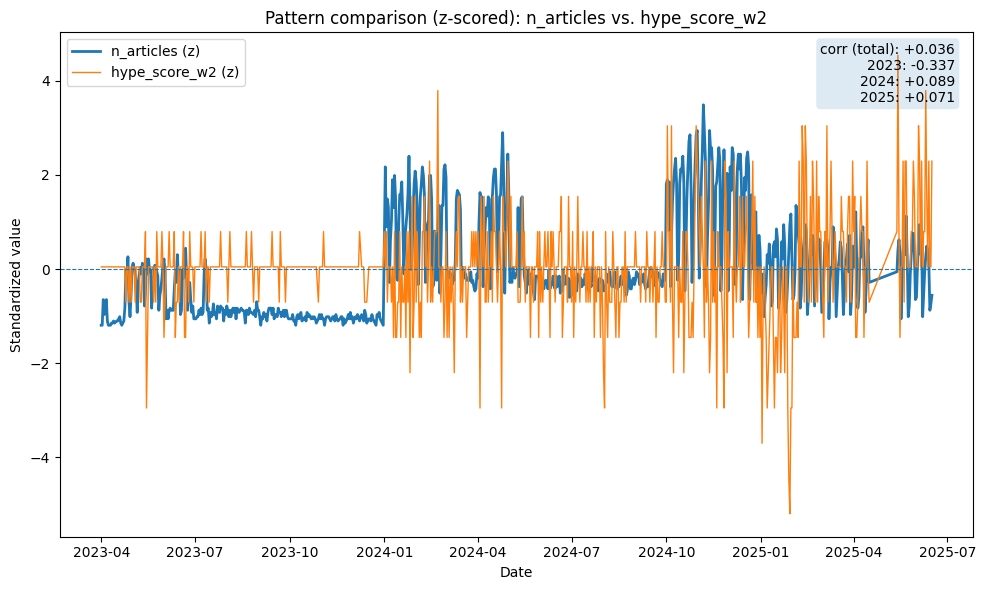

In [20]:
# rename for consistency
complete_df = complete_df.rename(columns={"hype_score": "hype_score_w0"})

# extract measures (only w1 for readability)
measures = ["hype_score_w2"]

# count articles / day & calculate total AINI (raw)
complete_agg = (
    complete_df.groupby("date")
    .agg(
        n_articles=("article_id", "count"),
        **{m: (m, "sum") for m in measures}
    )
    .reset_index()
)

# ensure datetime and subset to exclude data prior 01.04.2023
complete_agg["date"] = pd.to_datetime(complete_agg["date"])
cutoff = dt.datetime(2023, 4, 1)
complete_agg = complete_agg[complete_agg["date"] >= cutoff]

# prepare dataframe for plotting
dfp = complete_agg.set_index("date").copy()

# pick the single measure
m = measures[0]

# z-score helper that avoids div-by-zero
def zscore(s: pd.Series) -> pd.Series:
    mu = s.mean()
    sd = s.std()
    if pd.isna(sd) or sd == 0:
        return s * 0  # all zeros if no variation
    return (s - mu) / sd

# z-score series
dfp["n_articles_z"] = zscore(dfp["n_articles"])
dfp[f"{m}_z"] = zscore(dfp[m])

# total corr
r_total = float(dfp["n_articles_z"].corr(dfp[f"{m}_z"]))

# yearly corrs
yearly_corrs = {}
for y, g in dfp.groupby(dfp.index.year):
    if len(g) >= 2:
        yearly_corrs[int(y)] = float(g["n_articles_z"].corr(g[f"{m}_z"]))
    else:
        yearly_corrs[int(y)] = np.nan

# build annotation text
lines = [f"corr (total): {r_total:+.3f}"]
for y in sorted(yearly_corrs):
    r = yearly_corrs[y]
    lines.append(f"{y}: {r:+.3f}" if np.isfinite(r) else f"{y}: n/a")
anno_text = "\n".join(lines)

# --- plot ---
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(dfp.index, dfp["n_articles_z"], linewidth=2, label="n_articles (z)")
ax.plot(dfp.index, dfp[f"{m}_z"], linewidth=1, label=f"{m} (z)")

ax.axhline(0, linestyle="--", linewidth=0.8)
ax.set_title("Pattern comparison (z-scored): n_articles vs. hype_score_w2")
ax.set_xlabel("Date")
ax.set_ylabel("Standardized value")
ax.legend(loc="upper left", ncol=1)

# annotation box (upper right inside axes)
ax.text(
    0.98, 0.98, anno_text,
    transform=ax.transAxes,
    ha="right", va="top",
    fontsize=10,
    bbox=dict(boxstyle="round", alpha=0.15, edgecolor="none")
)

fig.tight_layout()
plt.show()

In [21]:
# save extrema for reporting
extrema.sort_values("n measures",ascending=False).to_csv(var_path/ "extrema.csv")

# again display extrema to define minima & maxima
extrema.sort_values("n measures",ascending=False)

,type,date,n measures,measure
0,minimum,2025-02-06,3,"normalized_AINI_custom, EMA_02_custom, EMA_08_..."
12,maximum,2025-06-07,3,"normalized_AINI_w0, EMA_02_w0, EMA_08_w0"
13,maximum,2025-06-16,3,"normalized_AINI_w2, EMA_02_w2, EMA_08_w2"
11,maximum,2023-04-01,3,"normalized_AINI_custom, EMA_02_custom, EMA_08_..."
4,minimum,2025-01-31,2,"EMA_02_w1, EMA_02_w2"
1,minimum,2023-08-13,2,"normalized_AINI_w0, EMA_08_w0"
14,maximum,2025-06-10,2,"normalized_AINI_w1, EMA_08_w1"
3,minimum,2025-01-28,2,"normalized_AINI_w1, EMA_08_w1"
2,minimum,2024-08-02,2,"normalized_AINI_w2, EMA_08_w2"
5,minimum,2025-01-20,1,EMA_02_w0


In [22]:
# cutoffs for minima
min_1  = pd.Timestamp("2025-02-06")  # n = 3
min_2a = pd.Timestamp("2025-01-31")  # n = 2
min_2b = pd.Timestamp("2023-08-13")  # n = 2

# cutoffs for maxima
max_1a = pd.Timestamp("2025-06-07")  # n = 3
max_1b = pd.Timestamp("2025-06-16")  # n = 3
max_2  = pd.Timestamp("2025-06-10")  # n = 2

# subset for minima
articles_min1  = complete_df[complete_df["date"] == min_1]
articles_min2a = complete_df[complete_df["date"] == min_2a]
articles_min2b = complete_df[complete_df["date"] == min_2b]

# subset for maxima
articles_max1a  = complete_df[complete_df["date"] == max_1a]
articles_max1b = complete_df[complete_df["date"] == max_1b]
articles_max2 = complete_df[complete_df["date"] == max_2]

# check n of observations
for name, df in [
    ("articles_min1",  articles_min1),
    ("articles_min2a", articles_min2a),
    ("articles_min2b", articles_min2b),
    ("articles_max1",  articles_max1a),
    ("articles_max2a", articles_max1b),
    ("articles_max2b", articles_max2),
]:
    print(f"{name}: {len(df)}")
articles_min1.columns

articles_min1: 44
articles_min2a: 33
articles_min2b: 7
articles_max1: 5
articles_max2a: 15
articles_max2b: 33


Index(['date', 'article_id', 'sentiment_label', 'hype_score_w0', 'date_w1',
       'sentiment_label_w1', 'hype_score_w1', 'date_w2', 'sentiment_label_w2',
       'hype_score_w2', 'date_c', 'sentiment_label_c', 'hype_score_c', 'title',
       'sub_title', 'section', 'cleaned_corpus', 'date_t'],
      dtype='object')

In [23]:
investigate_hype_articles(articles_min1)

Token indices sequence length is longer than the specified maximum sequence length for this model (1102 > 512). Running this sequence through the model will result in indexing errors


Title : Korn Ferry to Eliminate 8% of Workforce
Date  : 2025-02-06 00:00:00
Sec   : finance
Lbl   : negative, hype=-1
----------------------------------------------------------------------------------------------------
korn ferry to eliminate 8 % of workforce firm expects the plan to cut its annualized cost base in the range of $ 110 million and $ 120 million markets. finance 1 min. korn. ferry said it expects the workforce reduction to cut its annualized cost base in the range of 110 million and 120 million. korn. ferry plans to eliminate about 8 of its workforce, according to a regulatory filing. friday. the organizational consulting firm cited the challenging macroeconomic business environment given ongoing inflation, rising interest rates and global economic and geopolitical uncertainty. korn. ferry said its reduction is expected to be substantially completed of the third quarter of fiscal. the company expects the plan to reduce its annualized cost base in the range of 110 million 

,article_id,title,sub_title,section,date_w1,sentiment_label_w1,hype_score_w1,ai_window,tokens,tokens_joined
1045,1057,Korn Ferry to Eliminate 8% of Workforce,Firm expects the plan to cut its annualized co...,finance,2025-02-06,negative,-1,korn ferry to eliminate 8 % of workforce firm ...,[CLS],[ C L S ]
1051,1063,Halloween Candy Is Getting Scary Expensive,Americans are expected to spend $3.6 billion o...,economy,2025-02-06,negative,-1,halloween candy is getting scary expensive ame...,[CLS],[ C L S ]
1055,1067,Why Dean Phillips Is Taking On Joe Biden,He fears the President could lose to Donald Tr...,politics,2025-02-06,negative,-1,why dean phillips is taking on joe biden he fe...,[CLS],[ C L S ]


results show relevance of AI-Windows, as pretrained FinBERT used title + subtitle and the cleaned article body. That means the head (title+subtitle) is kept intact.

=> If tokens exceed 512, only the body is truncated; the head is preserved.

Inference is run only for rows with predicted_label == 1 (“AI-relevant”), where AI-Window was used. So, despite earlier usage of AI-window, simple truncation still alows for leakage of non-AI related sentiment in Inference. Thus, focus on Window-Based FinBERT in further investigation

In [24]:
articles_min2a

,date,article_id,sentiment_label,hype_score_w0,date_w1,sentiment_label_w1,hype_score_w1,date_w2,sentiment_label_w2,hype_score_w2,date_c,sentiment_label_c,hype_score_c,title,sub_title,section,cleaned_corpus,date_t
847,2025-01-31,859,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,Sweetgreen Hires Kale-Shooting Robots to Speed...,"Chipotle, Kura Sushi also dabble with automati...",business,Chipotle. Mexican. Grill is testing an automat...,2023-10-16 00:00:00
848,2025-01-31,860,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,China Reboots Its Belt and Road Initiative,Beijing is trying to make lending under the in...,world,Beijing is trying to make lending under the in...,2023-10-16 00:00:00
849,2025-01-31,861,neutral,0,2025-01-31,negative,-1,2025-01-31,negative,-1,2025-01-31,negative,-1.0,How the Israel-Hamas War Is Tilting the Global...,Moscow and Beijing seek to ride the wave of so...,world,How the. Israel-Hamas. War. Is. Tilting the. G...,2023-10-16 00:00:00
850,2025-01-31,862,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,Goldman Sachs Wants Out of Consumer Lending. E...,"The bank, which reports third-quarter earnings...",finance,"The latest news analysis. The bank, which repo...",2023-10-16 00:00:00
851,2025-01-31,863,neutral,0,2025-01-31,negative,-1,2025-01-31,negative,-1,2025-01-31,negative,-1.0,"In China’s Calls for Mideast Peace, Hamas Assa...",Ambiguity in official statements echoes tiptoe...,world,8 min. Chinese leader. Xi. Jinping hosted the ...,2023-10-16 00:00:00
852,2025-01-31,864,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,Judge Chutkan Gags Donald Trump,How can he be ordered not to talk about Mike P...,opinion,REVIEW. OUTLOOK. How can he be ordered not to ...,2023-10-16 00:00:00
853,2025-01-31,865,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,"Palestinian Lives Matter, Except to Hamas",Responsibility for civilian casualties in Gaza...,opinion,"REVIEW. OUTLOOK. Oct. 16, 635 pm. ET 712 3 min...",2023-10-16 00:00:00
855,2025-01-31,867,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,Funeral Held for 6-Year-Old Victim of What Pol...,Landlord charged in attack on Palestinian-Amer...,us-news,"U.S. Oct. 16, 421 pm. ET 6 min. Community memb...",2023-10-16 00:00:00
856,2025-01-31,868,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,Judge Imposes Limited Gag Order on Trump in Fe...,Defense team argued that restrictions on Repub...,us-news,U.S. 6 min. A lawyer for. Donald. Trump said t...,2023-10-16 00:00:00
857,2025-01-31,869,positive,1,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,"In Arab Enclave Near Detroit, ‘Everybody’s Gua...",Man was charged with making a threat against P...,us-news,U.S. 6 min. A march in support of. Palestinian...,2023-10-16 00:00:00


In [25]:
read(articles_min2a)

Extracting AI keyword context windows: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


Title   : How the Israel-Hamas War Is Tilting the Global Power Balance in Favor of Russia, China
Date    : 2025-01-31 00:00:00
Section : world
Scores  : hype_score_w0=0, hype_score_w1=-1, hype_score_w2=-1, hype_score_c=-1.0
--------------------------------------------------------------------------------

Article 1 of 5
Title   : In China’s Calls for Mideast Peace, Hamas Assault Goes Unmentioned
Date    : 2025-01-31 00:00:00
Section : world
Scores  : hype_score_w0=0, hype_score_w1=-1, hype_score_w2=-1, hype_score_c=-1.0
--------------------------------------------------------------------------------

Article 2 of 5
Stopping reader.


In [32]:
# 1) Rebuild the exact inference snippet for the version you’re inspecting
from ai_windows import extract_multiple_ai_snippets_title_context
import pandas as pd
from transformers import AutoTokenizer

def rebuild_inference_snippet(df_row, window: int):
    df1 = pd.DataFrame([{
        "title": df_row["title"],
        "sub_title": df_row.get("sub_title",""),
        "cleaned_corpus": df_row["cleaned_corpus"],
    }])
    out = extract_multiple_ai_snippets_title_context(
        df1,
        text_col="cleaned_corpus",
        output_col="ai_window",
        tokenizer_name="bert-base-uncased",
        max_tokens=512,
        context_window=window,
    )
    return out.loc[0, "ai_window"]

# Example for w1 (window=1); use window=2 for w2
row = complete_df.loc[complete_df["title"].str.contains(
    "Israel-Hamas War Is Tilting the Global Power Balance", na=False
)].iloc[0]

snippet_w1 = rebuild_inference_snippet(row, window=1)
print(snippet_w1 if snippet_w1 else "[EMPTY]")


Extracting AI snippets: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

[EMPTY]


Ensure article count does not bias AINI

Manually investiagte Minima & Maxima

In [26]:
# drop noisy estimates
merged_clean = merged[articles_min1] # too low samplesize + extrema
merged_clean

,date,normalized_AINI_w0,simple_AINI_w0,EMA_02_w0,EMA_08_w0,normalized_AINI_w1,simple_AINI_w1,EMA_02_w1,EMA_08_w1,normalized_AINI_w2,simple_AINI_w2,EMA_02_w2,EMA_08_w2,normalized_AINI_custom,simple_AINI_custom,EMA_02_custom,EMA_08_custom
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# investigate min 1
read(merged[merged["date"] == min_1])

ValueError: Missing column(s): ['title', 'section', 'cleaned_corpus']

In [ ]:
# investigate 01.04.2023; max 2 according to normalized_AINI_custom, simple_AINI_custom, EMA_02_custom, EMA_08_custom
articles_max1

In [ ]:
# drop noisy estimates
merged_clean = merged[merged["date"] != min_1]

# ensure datetime type
complete_df["date"] = pd.to_datetime(complete_df["date"], errors="coerce")

# subsets per year
df_2023 = complete_df[complete_df["date"].dt.year == 2023]
df_2024 = complete_df[complete_df["date"].dt.year == 2024]
df_2025 = complete_df[complete_df["date"].dt.year == 2025]

merged_clean
merged_clean["normalized_AINI_w2"].min()

Investigate AINI by year

In [ ]:
plot_aini_series_subplots(merged_clean)